<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width="25%" height="25%" />

# Pandas - Unit 15 - Concatenate, Merge and Join

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Manage DataFrame columns

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Concatenate, Merge and Join

You can merge, join, and concatenate your dataframes, so you can better analyze and derive insights from the data.


* There are 3 main ways of combining DataFrames together: **Concatenating, Merging, and Joining**
  * `pd.concat()` for combining DataFrames across rows or columns
  *` pd.merge()` for combining data on common columns or indices
  * `.join()` for combining data on a key column or an index




---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Concatenate

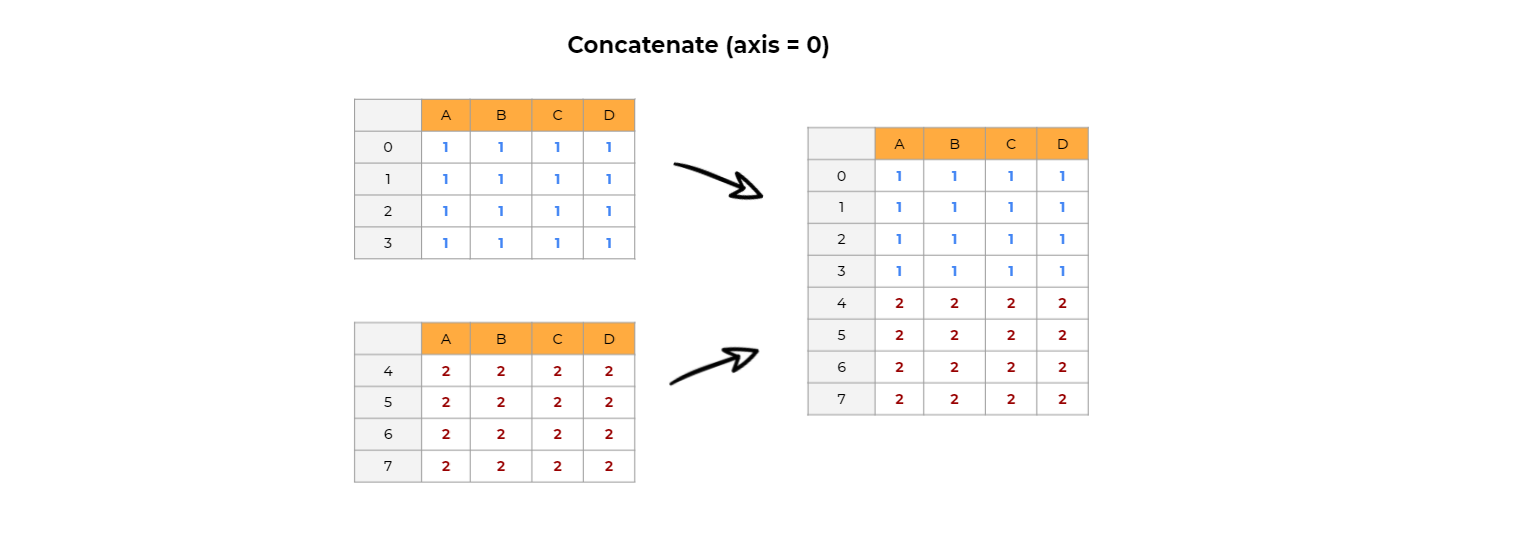

Your datasets are just stitched together along an axis, either the row axis or column axis. 
  * Consider 3 DataFrames, their content is constant, so you can better understand how the data was concatenated
  * They have the same columns. df2 and df3 have the same indices

df1 = pd.DataFrame(data= 1,
                   columns=['A','B','C','D'],
                   index=[0,1,2,3])

df2 = pd.DataFrame(data= 2 ,
                   columns=['A','B','C','D'],
                   index=[4,5,6,7])

df3 = pd.DataFrame(data= 3,
                   columns=['A','B','C','D'],
                   index=[4,5,6,7])


df1

df2

df3

You can concatenate by rows; ideally, when DataFrames share the same columns and have different indices parse in a list of DataFrames and use `pd.concat()`.
  * `axis=0`, indicating you are concatenating by row. Like, connecting "vertically"
  * Even though df2 and df3 have same indices, the `pd.concat()` operation worked. Note that all three DataFrames were "glued" one to another.
* The documentation is found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

pd.concat([df1,df2,df3],axis=0) 

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> **Note**: An alaternative way for concatenate is `.append()`, where you concatenate/append one DataFrame to another. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)
 * You can either append a single DataFrame or, passing in a list of DataFrames append multiple.

print('Appending a single DataFrame')
print(df1.append(df2))
print()
print('Passing in a list of DataFrames')
print(df1.append([df2, df3]))


You can concatenate by columns, when you set axis=1.
  * This is usefeul when DataFrames share the same indices and have different columns
  * Note that since df2 and df3 have the same indices, less NaN were generated for indices 4,5,6,7.

df1 = pd.DataFrame(data= 1,
                   columns=['A','B','C','D'],
                   index=[0,1,2,3])

df4 = pd.DataFrame(data= 2 ,
                   columns=['E','F','G','H'],
                   index=[4,5,6,7])

df5 = pd.DataFrame(data= 3,
                   columns=['I','J','K','L'],
                   index=[4,5,6,7])

pd.concat([df1,df2,df3], axis=1) 
# pd.concat([df1,df4,df5], axis=1)  # uncomment this line and try this option too

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will consider the following four DataFrames, three of which share the same indices but have different columns, and two that shares the same columns but have different indices.

pf1 = pd.DataFrame(data= 1,
                   columns=['A','B','C','D'],
                   index=[0,1,2,3])

pf2 = pd.DataFrame(data= 2 ,
                   columns=['E','F','G','H'],
                   index=[0,1,2,3])

pf3 = pd.DataFrame(data= 3,
                   columns=['I','J','K','L'],
                   index=[0,1,2,3])

pf4 = pd.DataFrame(data= 4,
                   columns=['A','B','C','D'],
                   index=[4,5,6,7])

Feel free to try out your ideas or use the following suggestions.

1. Choosing concat, which three DataFrames would you use to display a DataFrame with no NaN showing (the use of the correct value of axis will be necessary for this)
2. Which DataFrame will you append to pf1 to get a DataFrame with no NaN showing?.

# write your code here
pd.concat([pf1,pf2,pf3],axis=1) 

---

pd.concat([pf1,pf4],axis=0)

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Merge

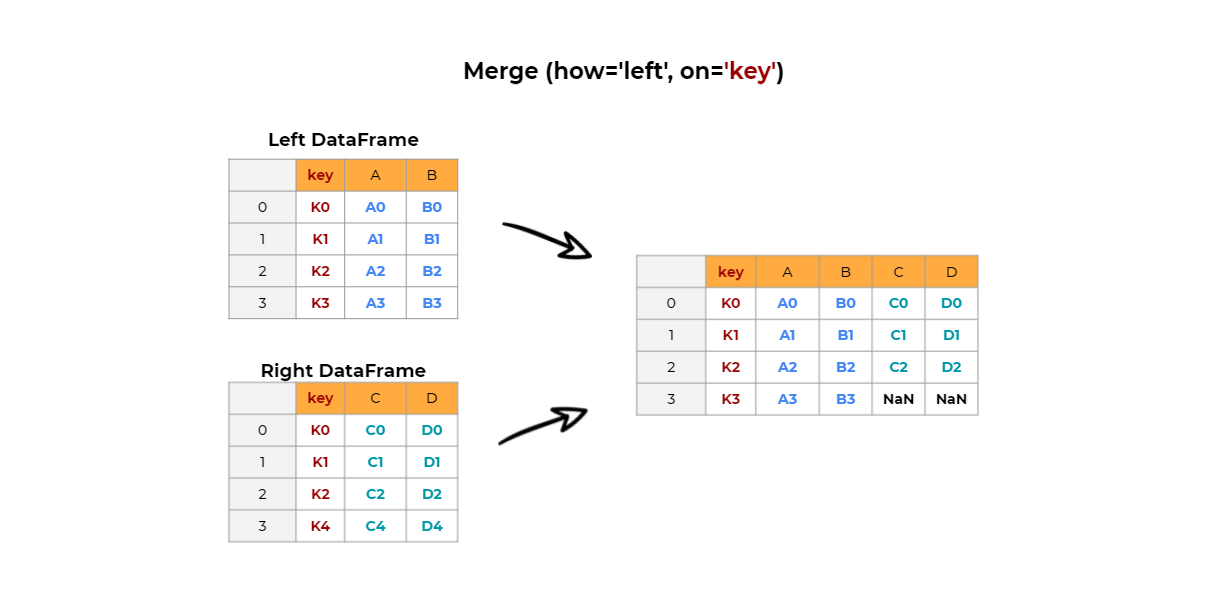

You can merge DataFrames using `pd.merge()`. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). This is similar logic to merging SQL tables.
* It is most useful when you want to combine rows that share data based on a common variable/key


Consider 2 DataFrames

df_1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
df_2 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K4'],
                          'C': ['C0', 'C1', 'C2', 'C4'],
                          'D': ['D0', 'D1', 'D2', 'D4']})    

Note at `key` column:  `df_1` kas K3, and `df_2` has K4.
* Both have K0, K1 and K2

df_1

df_2

You will provide the 2 DataFrames you are interested to merge. 
  * The first is referenced as left. The second, right.
  * 'how' is the type of merge to be performed - how: 'left','right', 'outer', 'inner'. In case you are familiar with SQL, this is equivalent when you combine SQL tables
    * It will be your job in the workplace to decide which type of merge should be performed
  * 'on' is the column to merge on



The example below shows when `how='left'`. Note that the result doesn't consider the 'key' column value which df_1 doesn't have, like K4


pd.merge(df_1, df_2, how='left', on='key')

The example below shows when `how='right'`. Note that the result doesn't consider the 'key' column value which df_2 doesn't have, like K3


pd.merge(df_1, df_2, how='right', on='key')

The example below shows when` how='inner'`. Note that the result doesn't consider the 'key' column values which left has and right doesnt, like K3 and K4
* It tends to have less missing data. In this case, no missing values


pd.merge(df_1,df_2,how='inner',on='key')

The example below shows when `how='outer'`. Note that the result considers all 'key' column values.
* Typically the result will produce more missing values

pd.merge(df_1,df_2,how='outer',on='key')

There could be cases where the DataFrames columns you are merging, will not have a shared column name. Imagine the following DataFrame.

df_3 = pd.DataFrame({'Column_key': ['K0', 'K1', 'K2', 'K4'],
                          'C': ['C10', 'C20', 'C30', 'C40'],
                          'D': ['D10', 'D20', 'D30', 'D40']}) 

df_3

You are interested to merge `df_3` and `df_1`, considering only the data that is mutual to both: `how='inner'`. 

* Note the column names that are used as reference to join both are different: `key` and `Column_key` 

df_1

When merging both, you should specify a column from each DataFrame, since the column names are different, use the **left_on** and **right_on** parameters.

* `left_on` uses the column named **key**, which is a column name of the DataFrame `df_1`.
* `right_on` uses the column named **Column_key**, which is a column name of the DataFrame `df_3`.


pd.merge(df_1, df_3, how='inner', left_on='key', right_on='Column_key')

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will consider the following datasets for practice.
* The first dataset, called df_user_usage, has users monthly mobile usage information for a subset of users.
* The second dataset, df_user_device has details of an individual user device, like plataform type and version, device name

When you run the code to display both DataFrames, you also get the column names; use that information to get the common column name you will require to merge the DataFrames. 



df_user_usage = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/user_usage.csv")
print(df_user_usage.columns)
df_user_usage.head()

df_user_device = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/user_device.csv")
print(df_user_device.columns)
df_user_device.head()

Feel free to try out your ideas or use the following suggestion.

* You are looking to merge both DataFrames using an inner join to access all the data you require in a single DataFrame.
* The left DataFrame should be df_user_usage, and the right should be df_user_device. 
* You don't require all the columns from df_user_device; only the column name common to both and two others 'platform' and 'device'.

# write your code here
pd.merge(df_user_usage, df_user_device[['use_id', 'platform', 'device']], on='use_id', how='inner')

---

pd.merge(df_user_usage,df_user_device, how='inner').head()

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Join

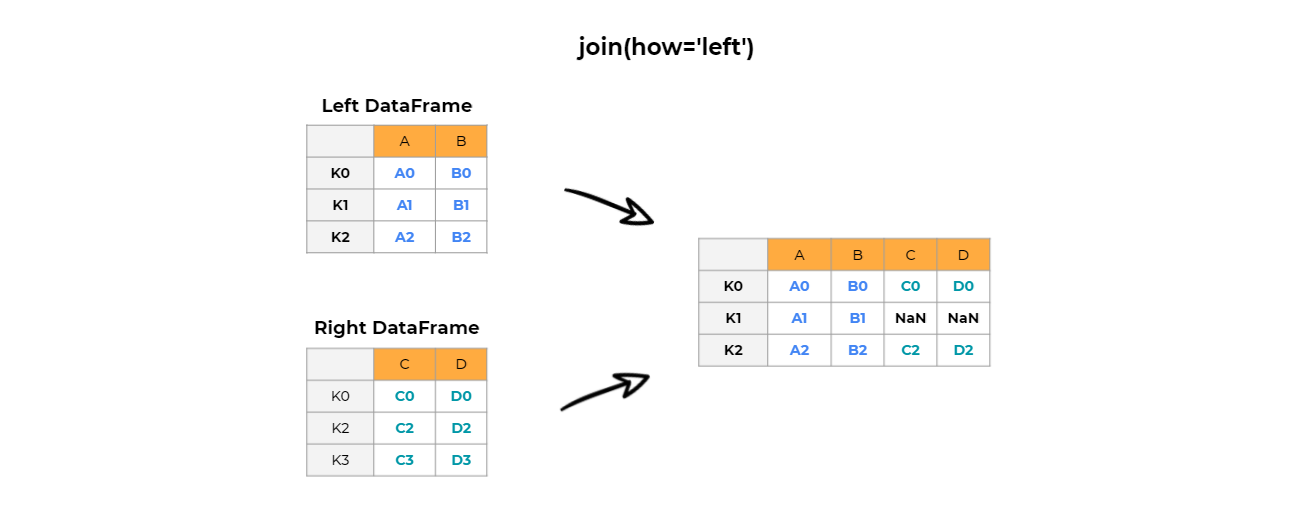

By default, `.join()` will attempt to join on **indices**. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)

df_left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                        'B': ['B0', 'B1', 'B2']},
                       index=['K0', 'K1', 'K2']) 

df_right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                         'D': ['D0', 'D2', 'D3']},
                        index=['K0', 'K2', 'K3'])

Note they have different **indices**
  * both have K0 and K2
  * df_left has K1
  * df_right has K3
  

df_left

df_right

The structure is the following:
  * write your first DataFrame
  * The the method `.join()`
  * The first argument the join method takes is a DataFrame or a list of DataFrames
  * '`how`' follows the same logic from `pd.merge()`

* The example below uses `how='left'` 
  * Note it displays indices only from left DataFrame

df_left.join(df_right,how='left')

The example below uses `how='right' `
  * Note it displays indices only from right DataFrame

df_left.join(df_right,how='right')

The example below uses `how='inner' `
  * Note it displays indices that both share

df_left.join(df_right,how='inner')

The example below uses `how='outer'` 
  * Note it displays all indices from both DataFrames
  

df_left.join(df_right,how='outer')

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will work on the datasets used in the previous practice named df_user_usage and df_user_device.



df_user_device = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/user_device.csv")
print(df_user_device.columns)
df_user_usage = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/user_usage.csv")
print(df_user_usage.columns)


We want to use the join method and join the two DataFrames, but there is a problem as the DataFrames share a column name. The documentation (linked to at the beginning of the join section) shows a few ways to do a join in a situation like this.
* Try out a join using set_index with the shared column name.

# Write your code here.
df_user_device.set_index('use_id').join(df_user_usage.set_index('use_id') , how='inner')

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> A good practice

As a reminder, it is always a good practice to check for missing data, either if you concatenate, merge or join. It helps you to avoid potential future surprise that your data is not in a proper shape
* Let's keep with the last example

df_result = df_left.join(df_right,how='left')

The simplest way to check for missing data in your DataFrame is with `.isna().sum()`

df_result.isna().sum()

---